# Some preliminaries...
$\newcommand{\Lagr}{\mathcal{L}}$
$\newcommand{\FT}{\mathcal{F}}$
$\newcommand{\xhat}{\hat{\textbf{x}}}$
$\newcommand{\yhat}{\hat{\textbf{y}}}$
$\newcommand{\zhat}{\hat{\textbf{z}}}$
$\newcommand{\ehat}{\hat{\textbf{e}}}$
$\newcommand{\Ev}{\textbf{E}}$
$\newcommand{\Dv}{\textbf{D}}$
$\newcommand{\Bv}{\textbf{B}}$
$\newcommand{\Hv}{\textbf{H}}$
$\newcommand{\Av}{\textbf{A}}$
$\newcommand{\Iv}{\textbf{I}}$
$\newcommand{\Jv}{\textbf{J}}$
$\newcommand{\Kv}{\textbf{K}}$
$\newcommand{\Lv}{\textbf{L}}$
$\newcommand{\Pv}{\textbf{P}}$
$\newcommand{\Fv}{\textbf{F}}$
$\newcommand{\Xv}{\textbf{X}}$
$\newcommand{\Mv}{\textbf{M}}$
$\newcommand{\Nv}{\textbf{N}}$
$\newcommand{\rv}{\textbf{r}}$
$\newcommand{\kv}{\textbf{k}}$
$\newcommand{\alpham}{\lbar{\alpha}}$
$\newcommand{\Gt}{\textbf{G}}$
$\newcommand{\sgn}{\operatorname{sgn}}$

In [2]:
import sys
sys.path.append('..')
import worx.MathObjects as math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mayavi import mlab
from numpy.lib.scimath import sqrt
pi=np.pi

# Scalar Fields

Typically, when performing scientific computing in matlab or C, one represents scalar or vector fields as datasets of grids of points.  While that may be necessary for discretized computation of those fields, it both consumes massive amounts of memory and does not correspond to the actual mathematical definition of a field.  Technically, a field is any set on which addition, subtraction, multiplication and division are defined and operate in the same way that they are defined for real numbers or integers.  In the particular context of physics and geometry, we are interested in fields of functions, where operations between the functions like addition, multiplication, division, etc are defined (e.g. adding functions is a defined operation which produces another function).  

$$h(x)=(f+g)(x)=f(x)+g(x)$$

We therefore describe things like an acoustic field as a scalar field, which means it is described by a scalar function which is "addable".  The wikipedia article on this is somewhat helpful: https://en.wikipedia.org/wiki/Field_(mathematics)#Geometry:_field_of_functions

What we are generally proposing here is another way of looking at representing and working with fields in computational physics.  A field will be represented as a function on a space, and you will be able to operate on these functions to generate new functions, without actually evaluating them on any particular data set.  This is not normally the case with python functions.  If you define two in-line functions and try to add them, it will give an error since adding functions is not a defined operation.

In [3]:
f=(lambda x,y: x*y)
g=(lambda x,y: x+y)
h=f+g

TypeError: unsupported operand type(s) for +: 'function' and 'function'

You can of course evaluate these at a point and operate on the results:

In [4]:
print(f(2,3)*g(2,3)+g(2,3)**2)

55


But the final function isn't defined until the initial functions are fed a dataset to operate on.  So to promote a these functions to fields, we need to create a new object class where operations are defined between them.  Let's just start with scalar fields, where we just need addition, subtraction, division, and multiplication.  The worx package provides an object class called a ScalarField, which when initialized with a function will return an object that acts like a field.  It allows for all sorts of standard operations between scalar functions, so as an example let's define $h(x)=f(x)g(x)+g(x)^2$.

In [5]:
f=math.ScalarField((lambda x,y: x*y))
g=math.ScalarField((lambda x,y: x+y))
h=(f*g)+g**2
print(h(2,3))

55


As an example, let's now feed $h(x)$ a grid of points and plot it (plotting at the end of the day will always require a discrete set).

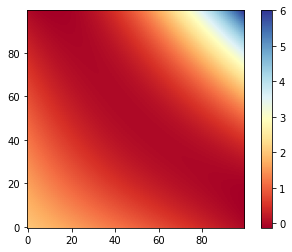

In [6]:
x_axis=np.linspace(-1,1,100)
y_axis=x_axis
[x,y]=np.meshgrid(x_axis,y_axis)

plt.imshow(h(x,y),origin='lower')
plt.colorbar()
plt.set_cmap("RdYlBu")

# Vector Fields

Now we can move from scalar fields to vector fields.  The concept of a vector is somewhat philosophical, in that it cannot be constructed solely out of the concept of numbers.  Said in reverse, the concept of a vector cannot be reduced or broken down solely into parts that only consist of numbers.  Vectors are things rather than numbers, and while numbers represent quantity, a pure quantity always begs the question, "quantity of what?"

So, to begin the construction of the concept of what a vector is, let's start with creating a mathematical notation for things rather than just numbers.  The thing may be a geometrical construct like an arrow pointing in a particular direction of space, or something more platonic like the form of a dog.

Let's write down a collection of $N$ things using set notation, and each thing we will label with a number $i$ so that the things have distinguishable names.

\begin{equation}
    \{\hat{\textbf{e}}_1,...\hat{\textbf{e}}_N\}=\{\hat{\textbf{e}}_i\}_{i=1}^N
\end{equation}

These things may be anything, but by way of example, let's choose a set of three things to particularly be arrows pointing in the three orthogonal directions of Euclidean space, so
\begin{equation}
    \{\hat{\textbf{e}}_1,\hat{\textbf{e}}_2,\hat{\textbf{e}}_3\}=\{\hat{\textbf{x}},\hat{\textbf{y}},\hat{\textbf{z}}\}
\end{equation}
They do not contain any information regarding distance along those three directions.  They are purely directions.

In order to account for distance in any direction, we assume that whatever these things are, they can be measured to have some quantity.  We use multiplication to indicate the quantity of the thing.  So one meter in the $x$-direction is indicated in our notation by multiplying the direction with the quantity:
\begin{equation}
    1 [meter]\hat{\textbf{x}}.
\end{equation}
Note that the unit of distance is carried in the $x$ variable, not in the $\hat{\textbf{x}}$.  So in general, traveling a measurable distance $x$ along the $\hat{\textbf{x}}$ direction is written
\begin{equation}
    x\hat{\textbf{x}}
\end{equation}

We can represent a new thing as a set of other things.  So let the new thing (which we will call a vector $\textbf{v})$) be a combination of quantities of different things.  Using set notation, this would be written
\begin{equation}
    \textbf{v}=\{x\hat{\textbf{x}},y\hat{\textbf{y}},z\hat{\textbf{z}}\}
\end{equation}

But in vector notation, we use the sum symbol to indicate a collection of different things:
\begin{equation}
    \textbf{v}=x\hat{\textbf{x}}+y\hat{\textbf{y}}+z\hat{\textbf{z}}.
\end{equation}

By way of nomenclature, the fundamental "things" $\hat{\textbf{x}}$, $\hat{\textbf{y}}$, and $\hat{\textbf{z}}$ are called \emph{basis elements} or \emph{basis vectors}, and a linear combination of them is referred to as a vector. 

To begin constructing vector fields in TensorWorx, first we define a euclidean basis: $\hat{\textbf{x}}, \hat{\textbf{y}}, \hat{\textbf{x}}$.  TensorWorx requires you to feed each one a distinct character to distinguish between basis elements.

In [7]:
xhat=math.EuclideanBasis('x')
yhat=math.EuclideanBasis('y')
zhat=math.EuclideanBasis('z')
print(xhat)
print(yhat)
print(zhat)

hat{x}
hat{y}
hat{z}


The most fundamental and unique thing about vector fields is that they are related by dot products.

In [7]:
print(xhat.dot(yhat))
print(xhat.dot(xhat))

0
1


But for addition and subtraction the operations are defined in the same way as for scalar fields.  If you add them then you get another vector.

In [8]:
print(type(xhat*2+yhat*3))

<class 'worx.MathObjects.Vector'>


TensorWorx constructs a vector as an object that uses a dictionary connecting each basis element to a number (or scalar field!) which is the coefficient of that basis element.  You can index vectors using the basis, and you can take dot products.  You can also print out all the components using the the "components" function.

In [9]:
V1=math.Vector({xhat:1,yhat:2,zhat:3})
V2=math.Vector({xhat:3,zhat:4})
print(V1[xhat])
print(V1.dot(xhat))
print(V1.dot(V2))
print(V1.components)

1
1
15
{hat{x}: 1, hat{y}: 2, hat{z}: 3}


Vector fields are formed using dictionaries connecting each basis element to a scalar field instead of
to an number.  The same math.Vector object works for both vectors and vector fields. But unlike dictionaries, they are operable!

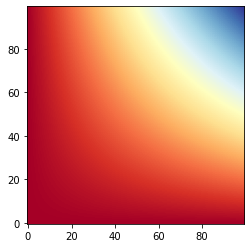

In [10]:
F1=math.Vector({xhat:f,yhat:g})
F2=math.Vector({xhat:g,yhat:g})
F3=F1+F2
plt.imshow(F3[xhat](x,y),origin='lower')

The dot product of vector fields is a scalar field:

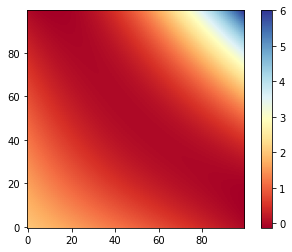

In [11]:
h2=F1.dot(F2)
plt.imshow(h2(x,y),origin='lower')
plt.colorbar()

Let's illustrate something a little fancier so you can see what you can do in a single line.  Let's plot $(\textbf{F}_1-\textbf{F}_1)\cdot\hat{\textbf{x}}$.  This results in a scalar field which is sampled using the grid given by x and y.

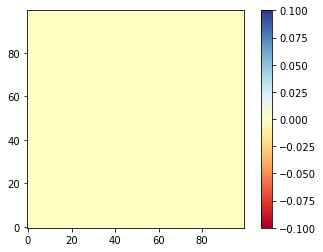

In [12]:
plt.imshow((F1-F1).dot(xhat)(x,y),origin='lower')
plt.colorbar()

# Tensors

Thus far, we have defined scalar functions and operations between them that yield other scalar functions.  We have also defined vectors that provide a sense of geometry (or "thing-ness" beyond mere quantity), and operations that map vectors to scalars (like the dot product) or map vectors to vectors (like the cross product).

If we think about the cross product and dot product, neither of them is a great analog to multiplication of scalars.  The dot product results in the loss of dimensionality and geometry to pure quantity, while the cross product is a very specific kind of product that is purely antisymmetric.

Just as multiplication is a linear map of scalar fields to scalar fields (in the sense that it follows the distributive property), we need a general linear map of vector fields to vector fields.  These are generally expressed as tensors.

Let's start with the simplest mapping.  Let's construct a map of $\hat{\textbf{x}}$ to $\hat{\textbf{x}}$, and not map anything else.  To do this, we define the tensor basis element,

$\hat{\textbf{x}}\otimes\hat{\textbf{x}}$

The way this element works is that it's a function on an input vector, such that the output of the function is the first vector times the dot product of the second vector with the input vector.  So when we feed this function the vector $\hat{\textbf{x}}$, we get,

$\hat{\textbf{x}}\otimes\hat{\textbf{x}}(\hat{\textbf{x}})=\hat{\textbf{x}} (\hat{\textbf{x}}\cdot\hat{\textbf{x}})=\hat{\textbf{x}}$.

Alternatively, if we feed the tensor element function with $\hat{\textbf{y}}$, we get

$\hat{\textbf{x}}\otimes\hat{\textbf{x}}(\hat{\textbf{y}})=\hat{\textbf{x}} (\hat{\textbf{x}}\cdot\hat{\textbf{y}})=0$.

Congratulations, you've defined a tensor.  Now in general, given a basis of an N-dimensional vector space $\{\hat{\textbf{e}}_i\}_{i=1}^N$, one can construct an arbitrary tensor using the tensor products of all the elements in the basis as,

$\textbf{T}=\sum_{i,j=1}^NT_{ij}\hat{\textbf{e}}_i\otimes\hat{\textbf{e}}_j$

where $T_{ij}$ are scalar coefficients of the expansion, and $\hat{\textbf{e}}_i\otimes\hat{\textbf{e}}_j$ are tensor elements.

In TensorWorx, we define tensor basis elements using two vector basis elements:

In [13]:
xTx=math.TensorElement(xhat,xhat)
xTy=math.TensorElement(xhat,yhat)
yTx=math.TensorElement(yhat,xhat)
yTy=math.TensorElement(yhat,yhat)
print(xTx)

hat{x}⊗hat{x}


In [14]:
T=xTx*4+xTy*5
print(T.components)

{hat{x}⊗hat{x}: 4, hat{x}⊗hat{y}: 5}


However, beware that you can only right-multiply and right-add by numbers.  I'd have to edit the integer and float objects inside python in order to get left multiply to work right, and I'm just bystepping that nastiness for the moment.

TensorWorx can also create a tensor defined by the tensor product of any two vectors, using the tensor_prod function of vectors:

In [15]:
v1=xhat*2+yhat*3
v2=xhat-yhat
v1Tv2=v1.tensor_prod(v2)
print(xhat.dot((T+v1Tv2).dot(xhat)))
print(v1Tv2.components)

6
{hat{x}⊗hat{x}: 2, hat{y}⊗hat{x}: 3, hat{x}⊗hat{y}: -2, hat{y}⊗hat{y}: -3}


We can define tensor fields using the same approach as vectors.  Either expand in a basis:

In [16]:
T=xTx*f+xTy*g

Or equivalently directly give it a dictionary mapping tensor elements to scalar fields:

In [17]:
T=math.Tensor({xTx:f,xTy:g})

Now let's take dot products of the tensor to reduce a component to a scalar field, and plot it.  So let's plot the scalar field $\hat{\textbf{x}}\cdot\textbf{T}\cdot\hat{\textbf{x}}$=f(x,y), which is the $\hat{\textbf{x}}\otimes\hat{\textbf{x}}$ component of $\textbf{T}$.

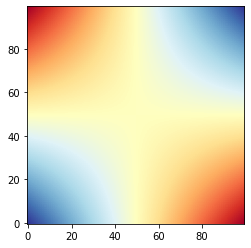

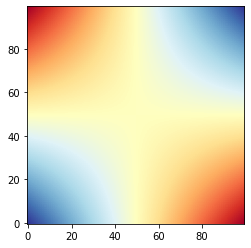

In [18]:
plt.figure(0)
plt.imshow(xhat.dot(T.dot(xhat))(x,y),origin='lower')
plt.figure(1)
plt.imshow(f(x,y),origin='lower')

#  Rotations on vectors ###

Here is a subroutine that generates a rotation matrix:

In [19]:
R_Matrix=math.RotMatrix(pi/4,'z')
print(R_Matrix)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


Here's how a rotation would work in numpy

In [20]:
v1=np.array([1,1,0]/sqrt(2))
v1p=np.matmul(R_Matrix,v1)
print(v1p)

[1.11022302e-16 1.00000000e+00 0.00000000e+00]


Let's do the same in TensorWorx.  Given a vector space (a list of basis elements) we can promote a numpy matrix to a tensor, and then take the dot product with a vector to rotate it.  Note that the vector or the tensor can be a subset of the vector space and rotation still works just fine.

In [21]:
vec_space=[xhat,yhat,zhat]
R_Tensor=math.MatrixToTensor(R_Matrix,vec_space)
v2=(xhat*1+yhat*1)/sqrt(2)
v2p=R_Tensor.dot(v2)
print(v2p.components)

{hat{x}: 1.1102230246251565e-16, hat{y}: 0.9999999999999999, hat{z}: 0.0}


There's also a built-in routine to rotate vectors.

In [22]:
v2p=v2.rotate(R_Tensor)
print(v2p.components)

{hat{x}: 1.1102230246251565e-16, hat{y}: 0.9999999999999999, hat{z}: 0.0}


#  Rotations on tensors ###

Tensors can be transposed...

In [23]:
R_Tensor=R_Tensor.T()
v2p=R_Tensor.dot(v2)
print(v2p.components)

{hat{x}: 0.9999999999999999, hat{y}: 1.1102230246251565e-16, hat{z}: 0.0}


Which means now we can use Euler rotation matrices to rotate other tensors:

In [24]:
alpha=xTx/2+xTy/2+yTx/2+yTy/2
R_Tensor=math.RotTensor(pi/4,'z',vec_space)
identity=R_Tensor.dot(R_Tensor.T())
alpha2=R_Tensor.dot(alpha.dot(R_Tensor.T()))
print(identity.components)
print(alpha2.components)

{hat{x}⊗hat{x}: 1.0, hat{y}⊗hat{x}: 0.0, hat{x}⊗hat{y}: 0.0, hat{y}⊗hat{y}: 1.0, hat{z}⊗hat{z}: 1.0}
{hat{x}⊗hat{x}: 6.162975822039155e-33, hat{y}⊗hat{x}: 7.850462293418875e-17, hat{x}⊗hat{y}: 1.1102230246251565e-16, hat{y}⊗hat{y}: 0.9999999999999999}


# Rotations  and translations on scalar fields

Let's create a scalar field that takes single argument, which is a vector valued input. I'll choose the function f=cos(theta).  But to do that, we need to define a function theta that takes a vector r and returns theta, so that f(r)=cos(theta(r)), where r is a vector.  There is a built in function to return functions that give the spherical coordinates of a vector:

In [25]:
(r,theta,phi)=math.VectorToSphericalCoordinates()
f=math.ScalarField((lambda r: np.cos(theta(r))))

Now let's define the space of coordinates in vector form and plot the scalar field:

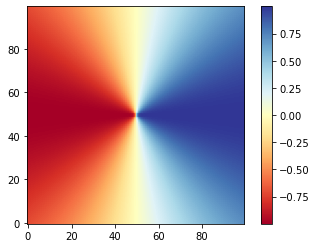

In [26]:
r=xhat*x+yhat*y
plt.figure(0)
plt.imshow(f(r),origin='lower')
plt.colorbar()

For a scalar valued function of a vector, we can rotate the function using a rotation tensor
applied to the vector input to the function, f'(r)=f(R^Tr), and plot the rotated scalar field:

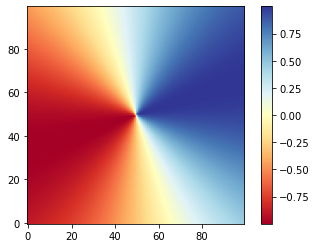

In [27]:
R=math.RotTensor(pi/10,'z',vec_space)
fp=math.ScalarField((lambda r: f(R.T().dot(r))))
plt.figure(1)
plt.imshow(fp(r),origin='lower')
plt.colorbar()

There's a built in routine for the scalar field object that does just this if supplied with a rotation tensor.  But mind that it only works if the scalar field is defined as a function of a vector. Let's test it by rotating backwards this time.

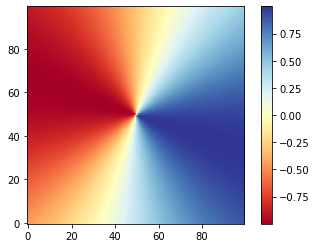

In [28]:
fp=f.rotate(R.T())
plt.figure(2)
plt.imshow(fp(r),origin='lower')
plt.colorbar()

Translations shift a scalar field by a supplied vector r0, such that f'(r)=f(r-r0).  There is a built-in function for this as well.

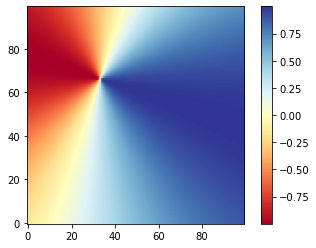

In [29]:
r0=xhat*(-1/3)+yhat*(1/3)
fp=fp.translate(r0)
plt.figure(3)
plt.imshow(fp(r),origin='lower')
plt.colorbar()

# Rotations and translations on vector fields

To rotate a vector field, you have to rotate both the basis and the coordinates.  The general formula is $\textbf{F}'(\textbf{r})=\textbf{RF}(\textbf{R}^T\textbf{r})$, for a rotation tensor $\textbf{R}$.  I've made a built-in function for this as well for vector objects.  Let's test it by first defining a vector field.  Let's choose $\cos(\theta)\hat{\theta}$ as a relevant example since this is the angular part of the scattering of a dipole into a parallel plate waveguide. Broken apart, $\cos(\theta)$ is a scalar field which is then multiplied by the vector field $\hat{\theta}$.  Both need to be defined as functions that take a vector in the space as an argument.  For $\theta$ that's given by,

In [30]:
(r,theta,phi)=math.VectorToSphericalCoordinates()

And for $\hat{\theta}$ that's, 

In [31]:
(r_hat,th_hat,ph_hat)=math.VectorToSphericalBasis()

Now let's form the vector field,

In [32]:
F=th_hat*math.ScalarField((lambda r: np.cos(theta(r))))

And adjust the coordinate grid a bit (just to make it easier to see with quiver), and then plot using quiver.

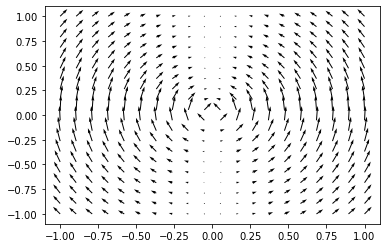

In [33]:
x_axis=np.linspace(-1,1,20)
y_axis=x_axis
[x,y]=np.meshgrid(x_axis,y_axis)
r=xhat*x+yhat*y
plt.figure(0)
plt.quiver(x,y,F.dot(xhat)(r),F.dot(yhat)(r))

Now, let's rotate this thing by pi/2, and then plot using quiver.

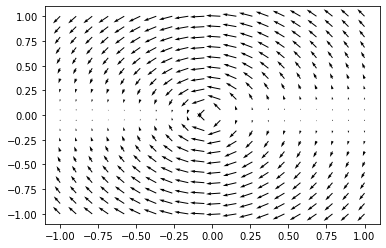

In [34]:
R=math.RotTensor(pi/2,'z',vec_space)
F2=F.rotate(R)
plt.figure(1)
plt.quiver(x,y,F2.dot(xhat)(r),F2.dot(yhat)(r))

Alright, now we can translate vector fields in the same way that we translate scalar fields.

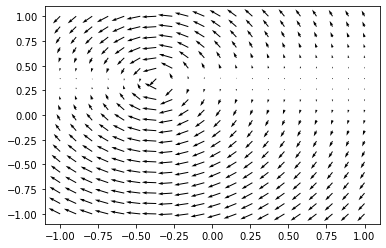

In [35]:
r0=xhat*(-1/3)+yhat*(1/3)
F3=F2.translate(r0)
plt.figure(2)
plt.quiver(x,y,F3.dot(xhat)(r),F3.dot(yhat)(r))

# Spherical coordinates vector space

I've made some special routines to return the vector fields that define spherical coordinates, but this time the coordinates for these vector fields are theta and phi, not x,y,z.  So we need to define new scalar fields theta and phi which accept (x,y,z) as arguments, and then these can be fed to the spherical coordinates basis vectors.

In [36]:
rhat=math.SphericalBasis('r')
th_hat=math.SphericalBasis('theta')
ph_hat=math.SphericalBasis('phi')
(r,theta,phi)=math.SphericalCoordinates()

Here's an example of how they can be used by plotting the scalar field $\hat{\textbf{y}}\cdot\hat{\theta}$:

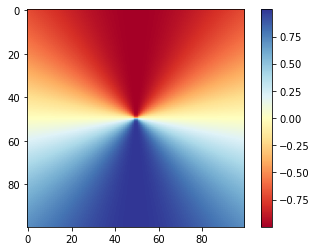

In [39]:
x_axis=np.linspace(-1,1,100)
y_axis=x_axis
[x,y]=np.meshgrid(x_axis,y_axis)
z=np.zeros(np.shape(x))
plt.figure(0)
plt.imshow(yhat.dot(rhat)(theta(x,y,z),phi(x,y,z)))
plt.colorbar()

But you don't have to operate on euclidean space... let's just look at theta space.

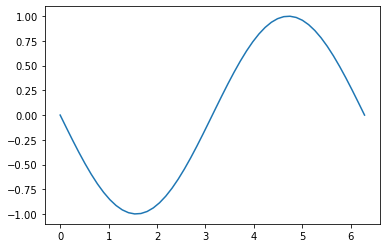

In [40]:
theta=np.linspace(0,2*pi)
phi=(pi/2)*np.ones(np.shape(theta))
plt.figure(1)
plt.plot(theta,xhat.dot(th_hat)(theta,phi))

#  Far-field Green's function for dipole at the origin

Now that we've set up the mathematical machinery of tensors and some tools for spherical coordinates, creating Green's functions is super easy.  First we need some emag constants

In [41]:
c=2.998e8
f=10e9
k=2*pi*f/c

The far-field electric and electromagnetic tensorial Green's functions evaluated at the origin are tensors on tangent space of a sphere:
\begin{align}
    \mathcal{G}(\kv)&=\frac{-k^2}{4\pi}\left(\hat{\theta}\otimes\hat{\theta}+\hat{\phi}\otimes\hat{\phi}\right) \\
    \mathcal{F}(\kv)&=\frac{k^2}{4\pi}\left(\hat{\theta}\otimes\hat{\phi}-\hat{\phi}\otimes\hat{\theta}\right).
\end{align}

In [42]:
G=(th_hat.tensor_prod(th_hat)+ph_hat.tensor_prod(ph_hat))*(-k**2/(4*pi))
F=(th_hat.tensor_prod(ph_hat)-ph_hat.tensor_prod(th_hat))*(k**2/(4*pi))

Let's compute the electric fields from a magnetic dipole.

In [44]:
M=xhat
E=G.dot(M)
Ephi=ph_hat.dot(E)
Etheta=th_hat.dot(E)
Enorm=(E.dot(E))**(1/2)

Let's create a coordinate grid to plot the fields:

(0.0, 5242.976060518766)

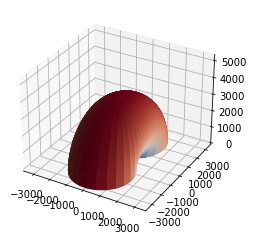

In [45]:
th_axis=np.linspace(0,2*pi,360)
ph_axis=np.linspace(0,pi/2,90)
[theta_grid,phi_grid]=np.meshgrid(th_axis,ph_axis)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
rhat=math.SphericalBasis('r')
R=(rhat*Enorm)(theta_grid,phi_grid) # literally all of the actual computation happens just in this step.
X=R[xhat]
Y=R[yhat]
Z=R[zhat]
R_norm=R.norm()/R.norm().max()
ax.plot_surface(X,Y,Z,facecolors=cm.coolwarm(R_norm),edgecolor='none')
plot_dim=R.norm().max()
ax.set_xlim([-plot_dim,plot_dim])
ax.set_ylim([-plot_dim,plot_dim])
ax.set_zlim([0,1.5*plot_dim])

# Far-Field Green's function for dipole at $\rv'$

The far-field Green's function for a dipole at an aribtrary position in space is,
\begin{align}
    \mathcal{G}(\kv,\rv')&=\frac{-k^2}{4\pi}\left(\hat{\theta}\otimes\hat{\theta}+\hat{\phi}\otimes\hat{\phi}\right)e^{i\kv\cdot\rv'} \\
    \mathcal{F}(\kv,\rv')&=\frac{k^2}{4\pi}\left(\hat{\theta}\otimes\hat{\phi}-\hat{\phi}\otimes\hat{\theta}\right)e^{i\kv\cdot\rv'}.
\end{align}
Looking at these equations, the Green's function is a tensor valued function of $\rv$ and $\rv'$, where $\rv$ is the field observation point and $\rv'$ is the location of the dipole.  In the far-field limit, we replace $\rv$ with $\kv$, which is defined as $k\hat{\rv}$, which is purely a function of angular coordinates $\theta$ and $\phi$ (and in that sense, the far-field limit allows an expression of the field that is separable in spherical coordinates).  So in the above expression, the tensorial part formed by $\hat{\theta}$ and $\hat{\phi}$ depends only on $\kv$ while the exponential depends on both $\kv$ and $\rv'$. 

Let's start by forming the tensorial part that depends only on $\kv$.  We will factor the Green's function into the product of a tensor with a scalar field like this:

$\mathcal{G}(\kv,\rv')=\textbf{T}(\kv)f(\kv,\rv')$

$\textbf{T}(\kv)=\frac{-k^2}{4\pi}\left(\hat{\theta}\otimes\hat{\theta}+\hat{\phi}\otimes\hat{\phi}\right)$

$f(\kv,\rv')=e^{i\kv\cdot\rv'}$

To do this, let's define $\kv$ by getting $\hat{\textbf{r}}$ as a vector field defined over $\theta$ and $\phi$ arguments.

In [8]:
rhat=math.SphericalBasis('r')

Then the k-vector is,

In [9]:
c=2.998e8
f=9.89e9
k0=2*pi*f/c
k=rhat*k0

Let's then define a second vector $\rv'$ which will represent the position of the dipole.

In [10]:
rp=yhat*0.5

The tensorial part of the Green's function just takes the k-vector as arguments.This function returns three vector fields, which are the spherical basis vectors.  The arguments of these vector fields will be a vector, and they calculate the spherical basis vectors at the location of the vector provided in the arguments.

In [11]:
(r_hat,th_hat,ph_hat)=math.VectorToSphericalBasis()

The tensorial bit of the Green's tensor is constructed in the same way using these new vector fields

In [12]:
T=(th_hat.tensor_prod(th_hat)+ph_hat.tensor_prod(ph_hat))

However, $\textbf{T}$ is a tensor that takes only $\kv$ as an argument, not $\rv'$.  But in order to use it to construct a Green's function using our typical rules for multiplication of scalar fields, i.e. 

$h(x)=f(x)g(x)$

the arguments for the two functions that are being multiplied need to be the same.  So in order to make them the same, we will add a dummy variable to $\textbf{T}(\kv)$, so that $\textbf{T}(\kv)$ becomes $\textbf{T}(\kv,\rv')$, but $\rv'$ doesn't do anything.

In [13]:
T=T.add_dummy()

Now this gets multiplied by a scalar field that depends two vectors: k and rp, which gives the free space far-field Green's function on k and rp.

In [14]:
f=math.ScalarField((lambda k,rp: k.norm()**2*np.exp(k.dot(rp)*1j)*(-1/(4*pi))))
G=T*f

Now we can choose dipole moment $\textbf{m}$ and calculate the magnetic field $\Hv$. $\mathcal{G}(\kv,\rv')$ depends on $\kv$ and $\rv'$, but we want to the magnetic field $\Hv(\kv)$ as a function of $\kv$ only.  So we need a way to evaluate the $\rv'$ variable to eleminate it in the Green's function before taking the dot product.  This can be done using the evaluate function on a tensor, vector or scalar field.  The second argument indicates the position in the arguments (starting at zero) where the input data is to be evaluated.

Once that's done, we can compute the norm of the field and find the radial Poynting vector.

In [16]:
M=xhat
H=(G.evaluate(rp,1)).dot(M)
Hphi=ph_hat.dot(H)
Htheta=th_hat.dot(H)
Hnorm=H.norm()
Z0=376
Sr=H.dot(H.conj())*Z0

Let's create a coordinate grid to plot the directivity of the dipole radiation pattern (360 points in $\theta$ and 90 points in $\phi$), and then generate the far-field plot in the usual way, where the radius of the pattern is proportional to directivity at a given angle.

In [18]:
(theta_grid,phi_grid,th_axis,ph_axis,dth,dph)=math.HalfSphereGrid(360,90)
# You can also create your own grid the same way using these lines:
# dth=pi/180
# dph=dth
# (theta_grid,phi_grid)=np.mgrid[-pi:pi:dth,0:pi/2:dph]

# Directivity definition
Prad=np.trapz(np.trapz(Sr(k(theta_grid,phi_grid))*np.sin(phi_grid)))*dth*dph
directivity=Sr*(4*pi/Prad)

# literally all of the actual computation happens just in this step, where the input grid of points is defined.
R=(r_hat*directivity)(k(theta_grid,phi_grid))
dir_max=directivity(k(theta_grid,phi_grid)).max()
print(dir_max)

X=np.real(R[xhat])
Y=np.real(R[yhat])
Z=np.real(R[zhat])
R_norm=np.real(R.norm()/R.norm().max())

mlab.init_notebook()
mlab.figure(1)
mlab.clf()
mlab.view(-45,-125)
mlab.mesh(X,Y,Z)

(3.0001168199292545+0j)
Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…